In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
# Reading the Dataset in the enviroment 
df = pd.read_sas(r"C:\Users\Raheb\Desktop\DBs\LLCP2022.XPT")

In [3]:
# Checking for the dataset dimensions
df.shape

(445132, 328)

In [4]:
# Printing all the column names 
df.columns.values

array(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1',
       'CELPHON1', 'LADULT1', 'COLGSEX1', 'NUMADULT', 'LANDSEX1',
       'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 'CTELNUM1',
       'CELLFON5', 'CADULT1', 'CELLSEX1', 'PVTRESD3', 'CCLGHOUS',
       'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH',
       'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1',
       'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'RMVTETH4',
       'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW',
       'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2',
       'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1',
       'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1',
       'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF',
       'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'HADMAM',
       'HOWLONG', 'CERVSCRN', '

In [5]:
df["_IMPRACE"].unique()

array([1., 2., 3., 4., 6., 5.])

In [6]:
# Feature Selection (Making a subset or a new dataset with relevant data)
selected_columns = ['_STATE', 'IDATE','MENTHLTH', 'SLEPTIM1', 'ADDEPEV3', 'MARITAL', 'RENTHOM1','EMPLOY1', 'CHILDREN','SMOKE100', 'ECIGNOW2', 'COVIDPOS', 'LSATISFY','EMTSUPRT', 'SDHISOLT', 'SDHSTRE1', '_PHYS14D', '_TOTINDA', '_SEX', '_AGE80', 'HTIN4', 'WTKG3', '_BMI5CAT', '_CHLDCNT', '_EDUCAG', '_INCOMG1', '_SMOKER3', 'DRNKANY6', 'DROCDY4_']
df1 = df[selected_columns]
df1.head()

,_STATE,IDATE,MENTHLTH,SLEPTIM1,ADDEPEV3,MARITAL,RENTHOM1,EMPLOY1,CHILDREN,SMOKE100,...,_AGE80,HTIN4,WTKG3,_BMI5CAT,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,DRNKANY6,DROCDY4_
0,1.0,b'02032022',88.0,8.0,2.0,1.0,1.0,7.0,88.0,2.0,...,80.0,NaN,NaN,NaN,1.0,4.0,9.0,4.0,2.0,5.397605e-79
1,1.0,b'02042022',88.0,6.0,2.0,3.0,1.0,2.0,88.0,2.0,...,80.0,63.0,6804.0,3.0,1.0,2.0,3.0,4.0,2.0,5.397605e-79
2,1.0,b'02022022',3.0,5.0,2.0,1.0,1.0,7.0,88.0,2.0,...,56.0,62.0,6350.0,3.0,1.0,4.0,6.0,4.0,2.0,5.397605e-79
3,1.0,b'02032022',88.0,7.0,2.0,1.0,1.0,7.0,88.0,1.0,...,73.0,65.0,6350.0,2.0,1.0,2.0,9.0,2.0,2.0,5.397605e-79
4,1.0,b'02022022',88.0,9.0,2.0,1.0,1.0,5.0,88.0,2.0,...,43.0,62.0,5398.0,2.0,1.0,3.0,3.0,4.0,1.0,1.000000e+01


In [7]:
# Checking for Data Types
df1.dtypes

_STATE      float64
IDATE        object
MENTHLTH    float64
SLEPTIM1    float64
ADDEPEV3    float64
MARITAL     float64
RENTHOM1    float64
EMPLOY1     float64
CHILDREN    float64
SMOKE100    float64
ECIGNOW2    float64
COVIDPOS    float64
LSATISFY    float64
EMTSUPRT    float64
SDHISOLT    float64
SDHSTRE1    float64
_PHYS14D    float64
_TOTINDA    float64
_SEX        float64
_AGE80      float64
HTIN4       float64
WTKG3       float64
_BMI5CAT    float64
_CHLDCNT    float64
_EDUCAG     float64
_INCOMG1    float64
_SMOKER3    float64
DRNKANY6    float64
DROCDY4_    float64
dtype: object

In [8]:
df1['_STATE'].nunique()

54

In [9]:
df1['_STATE'].value_counts()

_STATE
53.0    26152
36.0    17800
27.0    16821
39.0    16487
24.0    16418
48.0    14245
12.0    13393
55.0    11276
20.0    11247
25.0    11029
6.0     10952
23.0    10646
18.0    10466
51.0    10417
4.0     10185
26.0    10058
45.0    10037
49.0     9826
9.0      9784
8.0      9365
13.0     9236
19.0     8949
50.0     8811
34.0     8209
15.0     7747
31.0     7473
29.0     7438
46.0     7424
30.0     7048
33.0     6757
16.0     6280
44.0     5893
2.0      5865
40.0     5775
41.0     5756
22.0     5629
72.0     5509
5.0      5309
47.0     5266
54.0     4981
35.0     4758
42.0     4582
1.0      4506
37.0     4505
28.0     4239
38.0     4153
56.0     4142
17.0     4056
21.0     4023
10.0     3987
11.0     3237
32.0     3188
66.0     2266
78.0     1531
Name: count, dtype: int64

In [10]:
# Renaming the selected features for better and ease of use
columns_mapping = {'_STATE': 'State', 'IDATE':'Date', 'MENTHLTH' : 'Mental_Health_Days', 'SLEPTIM1': 'Sleep_Hours_per_day', 'ADDEPEV3': 'Deppresive_Dissorder', 'MARITAL': 'Marrital_Status', 'RENTHOM1': 'Home_Ownership','EMPLOY1': 'Employed_Status','SMOKE100': '100_Cigarettes_Lifetime', 'ECIGNOW2': 'Ecigs_Vapes', 'COVIDPOS': 'Covid_Status_Ever', 'LSATISFY': 'Satisfaction_Level','EMTSUPRT': 'Emotional_Support_Recieved', 'SDHISOLT': 'Social_Isolation', 'SDHSTRE1': 'Stress_30days', '_IMPRACE': 'Race/Ethnicity', '_PHYS14D': 'Physical_Health', '_TOTINDA': 'Physically_Active_30days', '_SEX': 'Sex_at_Birth', '_AGE80': 'Age_Distrubution', 'HTIN4': 'Height(inches)', 'WTKG3': 'Weight(kilograms)', '_BMI5CAT': 'BMI', '_CHLDCNT': 'Children_household', '_EDUCAG': 'Education', '_INCOMG1': 'Income', '_SMOKER3': 'Smoking', 'DRNKANY6': 'Drunk_30days', 'DROCDY4_':'Drinks_per_Day'}

# Create a copy of the DataFrame using the copy() method
df2 = df1.copy()

# Rename the columns in the copied DataFrame
df2.rename(columns=columns_mapping, inplace=True)

In [11]:
df2.dtypes

State                         float64
Date                           object
Mental_Health_Days            float64
Sleep_Hours_per_day           float64
Deppresive_Dissorder          float64
Marrital_Status               float64
Home_Ownership                float64
Employed_Status               float64
CHILDREN                      float64
100_Cigarettes_Lifetime       float64
Ecigs_Vapes                   float64
Covid_Status_Ever             float64
Satisfaction_Level            float64
Emotional_Support_Recieved    float64
Social_Isolation              float64
Stress_30days                 float64
Physical_Health               float64
Physically_Active_30days      float64
Sex_at_Birth                  float64
Age_Distrubution              float64
Height(inches)                float64
Weight(kilograms)             float64
BMI                           float64
Children_household            float64
Education                     float64
Income                        float64
Smoking     

In [12]:
# Stripping the Date section to make it more manageable 
df2["Date"] = df2["Date"].str.decode('utf-8').str.replace("[b']", '')

In [13]:
# Formatting the date variable in usable format
df2["Date"] = df2["Date"].apply(lambda x :x[0:2] + '-' + x[2:4] + '-' + x[4:8])

In [14]:
# Checking "State" variable for unique values 
df2["State"].unique()

array([ 1.,  2.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13., 15., 16.,
       17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       44., 45., 46., 47., 48., 49., 50., 51., 53., 54., 55., 56., 66.,
       72., 78.])

In [15]:
# Replacing labels with their corresponding State Names
value_label_mapping = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming', 66: 'Guam', 72: 'Puerto Rico', 78: 'Virgin Islands'}
# Replacing values in the "State" column with their corresponding labels
df2['State'] = df2['State'].replace(value_label_mapping)

In [16]:
# Checking for successful replacements
df2["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

In [17]:
# Survey Question: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
# Survey Answer: From the question asked above we got 170,836 answers with a numeric value whereas, 265,229 survey answers said they did not face any days of stress or anxiety.

In [18]:
# Set scientific notations off to display only 2 digits after decimal point
#df2 = df2.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

In [19]:
# Replacing the Data in "Mental Health" from the data key where 88 are none
df2['Mental_Health_Days'].replace([88], 0, inplace=True)

# Replace values 77 and 99 with "NA" in the "Mental_Health" column
df2['Mental_Health_Days'].replace([77, 99], "NA", inplace=True)

In [20]:
# Convert "Mental_Health" column to numeric type (float)
df2['Mental_Health_Days'] = pd.to_numeric(df2['Mental_Health_Days'], errors='coerce')

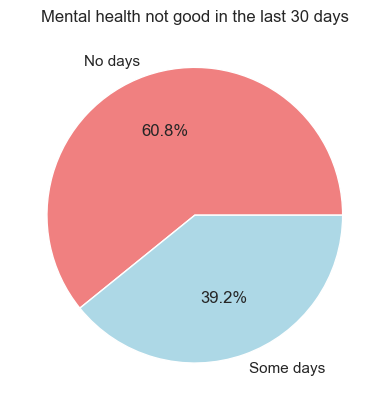

In [21]:
# Visualizing the data from survey responses that shows us that the sample population, 39.2% people faced either stress or anxiety
sns.set(style="whitegrid")

# Counting the occurrences of "0" and actual values in the "Mental_Health" column
zero_count = (df2["Mental_Health_Days"] == 0).sum()
actual_count = df2["Mental_Health_Days"].count() - zero_count

# Plotting the pie chart
plt.pie([zero_count, actual_count], labels=['No days', 'Some days'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Mental health not good in the last 30 days')
plt.show()

In [22]:
# From the plot we can see that there are more than 60% of the sample population with no days of mental health problems.
# Going ahead we will be focusing on the population where they faced some days of mental health problem as well as plotting them.

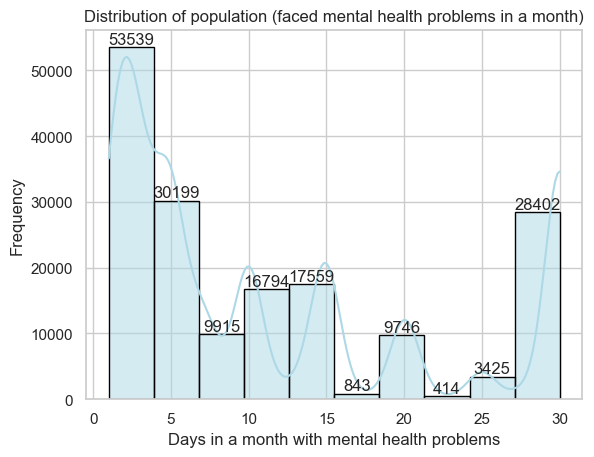

In [23]:
# Set the style for Seaborn (optional, but it enhances the visual appeal)
sns.set(style="whitegrid")

# Filtering out zero and NA values in the "Mental_Health" column
non_zero_values = df2["Mental_Health_Days"].dropna()[df2["Mental_Health_Days"] != 0]

# Plotting a histogram
ax = sns.histplot(non_zero_values, bins=10, kde=True, color='lightblue', edgecolor='black')
plt.xlabel('Days in a month with mental health problems')
plt.ylabel('Frequency')
plt.title('Distribution of population (faced mental health problems in a month)')

# Annotating the bars with their frequencies
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}',
            ha='center', va='bottom')

plt.show()

In [24]:
df2.columns.values

array(['State', 'Date', 'Mental_Health_Days', 'Sleep_Hours_per_day',
       'Deppresive_Dissorder', 'Marrital_Status', 'Home_Ownership',
       'Employed_Status', 'CHILDREN', '100_Cigarettes_Lifetime',
       'Ecigs_Vapes', 'Covid_Status_Ever', 'Satisfaction_Level',
       'Emotional_Support_Recieved', 'Social_Isolation', 'Stress_30days',
       'Physical_Health', 'Physically_Active_30days', 'Sex_at_Birth',
       'Age_Distrubution', 'Height(inches)', 'Weight(kilograms)', 'BMI',
       'Children_household', 'Education', 'Income', 'Smoking',
       'Drunk_30days', 'Drinks_per_Day'], dtype=object)

In [25]:
# Replace 77 and 99 with NaN in the "Sleep_Hours_per_day" column
df2['Sleep_Hours_per_day'].replace([77, 99], np.nan, inplace=True)

In [26]:
df2["Sleep_Hours_per_day"].describe()

count    439679.000000
mean          7.022983
std           1.502425
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: Sleep_Hours_per_day, dtype: float64

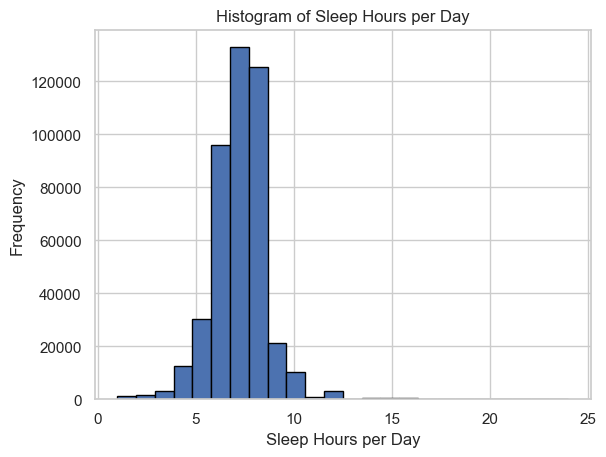

In [27]:
# Create a histogram for the "Sleep_Hours_per_day" column
plt.hist(df2["Sleep_Hours_per_day"].dropna(), bins=24, edgecolor='black')

# Add labels and title
plt.xlabel("Sleep Hours per Day")
plt.ylabel("Frequency")
plt.title("Histogram of Sleep Hours per Day")

# Show the histogram
plt.show()

In [28]:
# Replace 7 and 9 with NaN in the "Deppresive_Dissorder" column
df2['Deppresive_Dissorder'].replace([7, 9], np.nan, inplace=True)

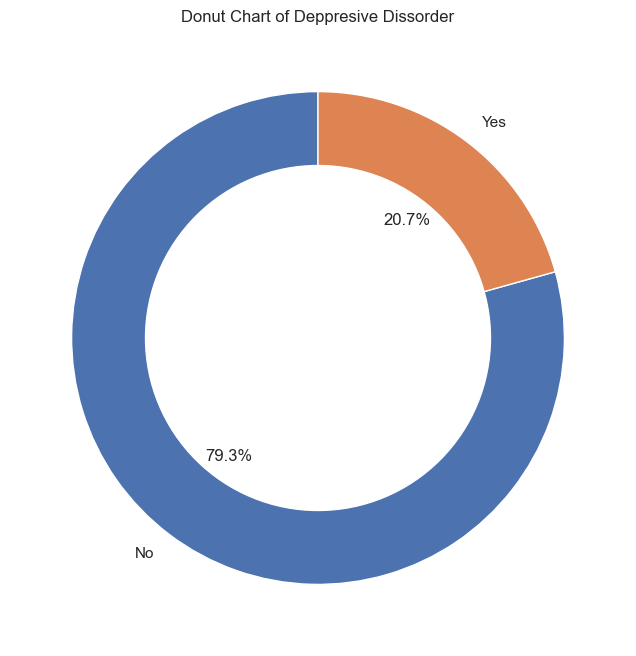

In [29]:
# Replace 1 with "Yes" and 2 with "No" in the "Deppresive_Dissorder" column
df2['Deppresive_Dissorder'].replace({1: "Yes", 2: "No"}, inplace=True)

# Count the occurrences of each value in "Deppresive_Dissorder" and drop NaN values
value_counts = df2['Deppresive_Dissorder'].dropna().value_counts()

# Create a donut chart using Seaborn and Matplotlib
plt.figure(figsize=(8, 8))
wedges, text, autotext = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title("Donut Chart of Deppresive Dissorder")

# Show the donut chart
plt.show()

In [30]:
# Define a dictionary to map values to labels
marital_status_mapping = {
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Never married',
    6: 'A member of an unmarried couple',
    9: 'Refused'
}

# Map the 'Marital_Status' column to its corresponding label
df2['Marrital_Status'] = df2['Marrital_Status'].map(marital_status_mapping)

In [31]:
# Define a dictionary to map values to labels
housing_status_mapping = {
    1: 'Own',
    2: 'Rent',
    3: 'Other arrangement',
    7: 'Don’t know/Not Sure',
    9: 'Refused'
}

# Map the 'Housing_Status' column to its corresponding label
df2['Home_Ownership'] = df2['Home_Ownership'].map(housing_status_mapping)


In [32]:
df2['CHILDREN'].unique()

array([8.80000000e+01, 1.00000000e+00, 4.00000000e+00, 2.00000000e+00,
                  nan, 3.00000000e+00, 5.00000000e+00, 9.90000000e+01,
       9.00000000e+00, 6.00000000e+00, 7.00000000e+00, 1.40000000e+01,
       1.00000000e+01, 8.00000000e+00, 1.10000000e+01, 1.50000000e+01,
       2.10000000e+01, 1.30000000e+01, 1.20000000e+01, 2.00000000e+01,
       5.50000000e+01, 4.20000000e+01, 1.70000000e+01, 8.10000000e+01,
       4.00000000e+01, 1.60000000e+01, 3.30000000e+01, 1.80000000e+01,
       3.00000000e+01, 2.20000000e+01, 4.80000000e+01, 8.20000000e+01,
       5.39760535e-79, 2.30000000e+01, 6.10000000e+01, 2.50000000e+01])

In [33]:
# Replace values 88 with 0 and 99 with NaN
df2['CHILDREN'].replace({88: 0, 99: np.nan}, inplace=True)

In [34]:
df2['CHILDREN'] = df2['CHILDREN'].apply(lambda x: round(x) if pd.notna(x) else x).astype('Int64')

In [35]:
replacement_mapping = {
    14: 1,
    10: 1,
    11: 1,
    15: 2,
    21: 2,
    13: 1,
    12: 1,
    20: 2,
    55: 6,
    42: 4,
    17: 2,
    81: 8,
    40: 4,
    16: 2,
    33: 3,
    18: 2,
    30: 3,
    22: 2,
    48: 5,
    82: 8,
    23: 2,
    61: 6,
    25: 3
}

# Apply the replacement to the 'CHILDREN' column
df2['CHILDREN'] = df2['CHILDREN'].replace(replacement_mapping)

In [36]:
# Reset the format to normal numeric
df2['CHILDREN'] = df2['CHILDREN'].apply(lambda x: f'{x:.0f}' if pd.notna(x) else x).astype('Int64')

In [37]:
df2['CHILDREN'].unique()

<IntegerArray>
[0, 1, 4, 2, <NA>, 3, 5, 9, 6, 7, 8]
Length: 11, dtype: Int64

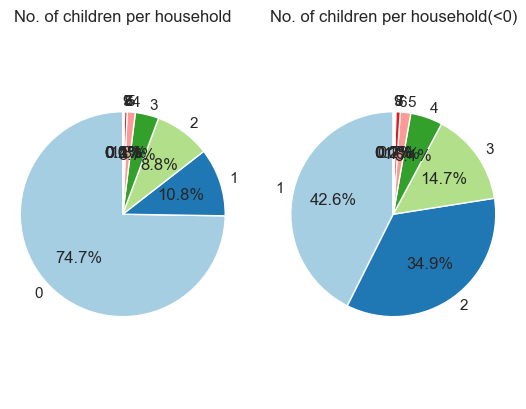

In [38]:
# Calculate value counts for the 'CHILDREN' column
value_counts = df2['CHILDREN'].value_counts()

# Plot the original pie chart
plt.subplot(1, 2, 1)
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('No. of children per household')

# Create a DataFrame without the value '0'
filtered_df = df2[df2['CHILDREN'] != 0]
filtered_value_counts = filtered_df['CHILDREN'].value_counts()

# Plot the pie chart excluding the value '0'
plt.subplot(1, 2, 2)
plt.pie(filtered_value_counts, labels=filtered_value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('No. of children per household(<0)')

plt.show()

In [39]:
df2["100_Cigarettes_Lifetime"].unique()

array([ 2.,  1.,  7., nan,  9.])

In [40]:
mapping_dict = {1.0: "Yes", 2.0: "No", 7.0: "Not Sure", 9.0: None}
df2["100_Cigarettes_Lifetime"] = df2["100_Cigarettes_Lifetime"].map(mapping_dict)

In [41]:
mapping_dict = {
    1: "Never used e-cigarettes",
    2: "Use them every day",
    3: "Use them some days",
    4: "Not at all (right now)",
    7: "Don’t know / Not sure",
    9: "Refused",
    "BLANK": "Not asked or Missing"
}

df2['Ecigs_Vapes'] = df2['Ecigs_Vapes'].replace(mapping_dict)

In [42]:
mapping_dict = {
    1: "Yes",
    2: "No",
    3: "Tested positive using home test",
    7: "Don’t know/Not Sure",
    9: "Refused",
    "BLANK": "Not asked or Missing"
}

# Replace values in the specified column using the mapping dictionary
df2['Covid_Status_Ever'] = df2['Covid_Status_Ever'].replace(mapping_dict)

In [43]:
mapping_dict = {
    1: "Very satisfied",
    2: "Satisfied",
    3: "Dissatisfied",
    4: "Very dissatisfied",
    7: "Don’t know/Not sure",
    9: "Refused",
    "BLANK": "Not asked or Missing"
}
df2['Satisfaction_Level'] = df2['Satisfaction_Level'].replace(mapping_dict)

In [44]:
mapping_dict = {
    1: "Always",
    2: "Usually",
    3: "Sometimes",
    4: "Rarely",
    5: "Never",
    7: "Don’t know/Not sure",
    9: "Refused",
    "BLANK": "Not asked or Missing"
}

# Replace values in the specified column using the mapping dictionary
df2['Emotional_Support_Recieved'] = df2['Emotional_Support_Recieved'].replace(mapping_dict)

In [45]:
mapping_dict = {
    1: "Always",
    2: "Usually",
    3: "Sometimes",
    4: "Rarely",
    5: "Never",
    7: "Don’t know/Not sure",
    9: "Refused",
    "BLANK": "Not asked or Missing"
}

df2['Social_Isolation'] = df2['Social_Isolation'].replace(mapping_dict)

In [46]:
df2['Race/Ethnicity'] = df['_IMPRACE']
mapping_dict = {
    1: "White",
    2: "Black",
    3: "Asian",
    4: "American Indian/Alaskan Native",
    5: "Hispanic",
    6: "Other race, Non-Hispanic"
}

# Replace values in the specified column using the mapping dictionary
df2['Race/Ethnicity'] = df2['Race/Ethnicity'].replace(mapping_dict)

In [47]:
mapping_dict = {
    1: "Always",
    2: "Usually",
    3: "Sometimes",
    4: "Rarely",
    5: "Never",
    7: "Don’t know/Not Sure",
    9: "Refused",
    "BLANK": "Not asked or Missing"
}

df2['Stress_30days'] = df2['Stress_30days'].replace(mapping_dict)

In [48]:
mapping_dict = {
    1: "Zero days when physical health not good",
    2: "1-13 days when physical health not good",
    3: "14+ days when physical health not good",
    9: "Don’t know/Refused/Missing"
}

# Create a new column "Modified_Column" with the modified values
df2['Physical_Health'] = df2['Physical_Health'].replace(mapping_dict)

In [49]:
mapping_dict = {
    1: "Had physical activity or exercise",
    2: "No physical activity or exercise in last 30 days",
    9: "Don’t know/Refused/Missing"
}

df2['Physically_Active_30days'] = df2['Physically_Active_30days'].replace(mapping_dict)

In [50]:
mapping_dict = {
    1: "Male",
    2: "Female"
}

df2['Sex_at_Birth'] = df2['Sex_at_Birth'].replace(mapping_dict)

In [51]:
mapping_dict = {
    1: "Underweight",
    2: "Normal Weight",
    3: "Overweight",
    4: "Obese",
    "BLANK": "Don’t know/Refused/Missing"
}

df2['BMI'] = df2['BMI'].replace(mapping_dict)

In [52]:
df2.drop(columns=["Children_household"], errors="ignore", inplace=True)

In [53]:
mapping_dict = {
    1: "Did not graduate High School",
    2: "Graduated High School",
    3: "Attended College or Technical School",
    4: "Graduated from College or Technical School",
    9: "Don’t know/Not sure/Missing"
}

df2['Education'] = df2['Education'].replace(mapping_dict)

In [54]:
mapping_dict = {
    1: "Less than $15,000",
    2: "$15,000 to < $25,000",
    3: "$25,000 to < $35,000",
    4: "$35,000 to < $50,000",
    5: "$50,000 to < $100,000",
    6: "$100,000 to < $200,000",
    7: "$200,000 or more",
    9: "Don’t know/Not sure/Missing"
}

# Create a new column "Modified_Column" with the modified values
df2['Income'] = df2['Income'].replace(mapping_dict)

In [55]:
mapping_dict = {
    1: "Every day",
    2: "Some days",
    3: "Former smoker",
    4: "Never smoked",
    9: "Don’t know/Refused/Missing"
}

# Create a new column "Modified_Column" with the modified values
df2['Smoking'] = df2['Smoking'].replace(mapping_dict)

In [56]:
mapping_dict = {
    1: "Yes",
    2: "No",
    7: "Don’t know/Not Sure",
    9: "Refused/Missing"
}

# Create a new column "Modified_Column" with the modified values
df2['Drunk_30days'] = df2['Drunk_30days'].replace(mapping_dict)

In [57]:
df2['Drinks_per_Day'].unique()

array([5.39760535e-79, 1.00000000e+01, 1.70000000e+01, 3.00000000e+00,
       7.00000000e+00, 1.30000000e+01, 9.00000000e+02, 8.60000000e+01,
       7.10000000e+01, 2.90000000e+01, 1.40000000e+01, 3.30000000e+01,
       1.00000000e+02, 8.30000000e+01, 9.70000000e+01, 4.30000000e+01,
       9.30000000e+01, 5.70000000e+01, 2.30000000e+01, 2.70000000e+01,
       2.00000000e+01, 5.00000000e+01, 6.70000000e+01, 4.00000000e+01,
       6.00000000e+01, 5.30000000e+01, 3.00000000e+01, 4.70000000e+01,
       7.00000000e+01, 9.00000000e+01, 8.00000000e+01, 8.70000000e+01,
       7.30000000e+01, 7.70000000e+01, 3.70000000e+01, 6.30000000e+01,
                  nan])

In [58]:
df2['Drinks_per_Day'].map('{:.1f}'.format).unique()

array(['0.0', '10.0', '17.0', '3.0', '7.0', '13.0', '900.0', '86.0',
       '71.0', '29.0', '14.0', '33.0', '100.0', '83.0', '97.0', '43.0',
       '93.0', '57.0', '23.0', '27.0', '20.0', '50.0', '67.0', '40.0',
       '60.0', '53.0', '30.0', '47.0', '70.0', '90.0', '80.0', '87.0',
       '73.0', '77.0', '37.0', '63.0', 'nan'], dtype=object)

In [59]:
# Set the display option to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [60]:
df2["Weight(kilograms)"] = df2["Weight(kilograms)"] / 100

In [61]:
df2.dtypes

State                          object
Date                           object
Mental_Health_Days            float64
Sleep_Hours_per_day           float64
Deppresive_Dissorder           object
Marrital_Status                object
Home_Ownership                 object
Employed_Status               float64
CHILDREN                        Int64
100_Cigarettes_Lifetime        object
Ecigs_Vapes                    object
Covid_Status_Ever              object
Satisfaction_Level             object
Emotional_Support_Recieved     object
Social_Isolation               object
Stress_30days                  object
Physical_Health                object
Physically_Active_30days       object
Sex_at_Birth                   object
Age_Distrubution              float64
Height(inches)                float64
Weight(kilograms)             float64
BMI                            object
Education                      object
Income                         object
Smoking                        object
Drunk_30days

In [62]:
employment_mapping = {
    1: "Employed for wages",
    2: "Self-employed",
    3: "Out of work for 1 year or more",
    4: "Out of work for less than 1 year",
    5: "A homemaker",
    6: "A student",
    7: "Retired",
    8: "Unable to work",
    9: "Refused",
    "BLANK": "Not asked or Missing"
}

# Replace the values in the "Employment_Status" column with their corresponding labels
df2["Employed_Status"] = df2["Employed_Status"].replace(employment_mapping)

In [63]:
missing_values = df2.isna().sum()
missing_values

State                              0
Date                               0
Mental_Health_Days              9067
Sleep_Hours_per_day             5453
Deppresive_Dissorder            2812
Marrital_Status                    8
Home_Ownership                     9
Employed_Status                 6196
CHILDREN                       14464
100_Cigarettes_Lifetime        32663
Ecigs_Vapes                    33579
Covid_Status_Ever              49235
Satisfaction_Level            190644
Emotional_Support_Recieved    190991
Social_Isolation              191342
Stress_30days                 193921
Physical_Health                    0
Physically_Active_30days           0
Sex_at_Birth                       0
Age_Distrubution                   0
Height(inches)                 32476
Weight(kilograms)              42078
BMI                            48806
Education                          0
Income                             0
Smoking                            0
Drunk_30days                       0
D

In [64]:
df2.shape

(445132, 29)

In [65]:
# Percentage of missing or 'na' values across variables in the data frame
total_rows = len(df2)
missing_percentage = (df2.isna().sum() / total_rows) * 100
print("Percentage of missing values for each variable:")
print(missing_percentage)

Percentage of missing values for each variable:
State                         0.00
Date                          0.00
Mental_Health_Days            2.04
Sleep_Hours_per_day           1.23
Deppresive_Dissorder          0.63
Marrital_Status               0.00
Home_Ownership                0.00
Employed_Status               1.39
CHILDREN                      3.25
100_Cigarettes_Lifetime       7.34
Ecigs_Vapes                   7.54
Covid_Status_Ever            11.06
Satisfaction_Level           42.83
Emotional_Support_Recieved   42.91
Social_Isolation             42.99
Stress_30days                43.56
Physical_Health               0.00
Physically_Active_30days      0.00
Sex_at_Birth                  0.00
Age_Distrubution              0.00
Height(inches)                7.30
Weight(kilograms)             9.45
BMI                          10.96
Education                     0.00
Income                        0.00
Smoking                       0.00
Drunk_30days                  0.00
Drinks_

In [66]:
# Handling missing values in the dataset(Height, Weight, and BMI)
# As we have the variable "Sex_at_Birth" with no missing values, we can use it to impute the mean of Weight and Height based on Sex respectively
# We can further create a new variable BMI, which will be calculated using these new values as there are 11% missing values
# Calculate mean height for males and females
mean_height_male = df2[df2['Sex_at_Birth'] == 'Male']['Height(inches)'].mean()
mean_height_female = df2[df2['Sex_at_Birth'] == 'Female']['Height(inches)'].mean()

# Round mean height values to the nearest whole number
mean_height_male = round(mean_height_male)
mean_height_female = round(mean_height_female)

# Fill missing values with rounded mean heights
df2.loc[df2['Sex_at_Birth'] == 'Male', 'Height(inches)'] = df2.loc[df2['Sex_at_Birth'] == 'Male', 'Height(inches)'].fillna(mean_height_male)
df2.loc[df2['Sex_at_Birth'] == 'Female', 'Height(inches)'] = df2.loc[df2['Sex_at_Birth'] == 'Female', 'Height(inches)'].fillna(mean_height_female)

In [67]:
df2["Height(inches)"].isnull().sum()

0

In [68]:
mean_weight_male = df2[df2['Sex_at_Birth'] == 'Male']['Weight(kilograms)'].mean()
mean_weight_female = df2[df2['Sex_at_Birth'] == 'Female']['Weight(kilograms)'].mean()
print("Mean Weight for Males:", mean_weight_male)
print("Mean Weight for Females:", mean_weight_female)

Mean Weight for Males: 90.75372073651236
Mean Weight for Females: 75.8283316214587


In [69]:
mean_weight_male1 = round(df2[df2['Sex_at_Birth'] == 'Male']['Weight(kilograms)'].mean(), 2)
mean_weight_female1 = round(df2[df2['Sex_at_Birth'] == 'Female']['Weight(kilograms)'].mean(), 2)
df2.loc[df2['Sex_at_Birth'] == 'Male', 'Weight(kilograms)'] = df2.loc[df2['Sex_at_Birth'] == 'Male', 'Weight(kilograms)'].fillna(mean_weight_male1)
df2.loc[df2['Sex_at_Birth'] == 'Female', 'Weight(kilograms)'] = df2.loc[df2['Sex_at_Birth'] == 'Female', 'Weight(kilograms)'].fillna(mean_weight_female1)

In [70]:
# Calculating and creating a new variable "Body_Mass_Index"
df2['Height(meters)'] = df2['Height(inches)'] * 0.0254  # 1 inch = 0.0254 meters

# Calculate denominator for BMI separately
denominator = (df2['Height(meters)']) ** 2

# Calculate BMI
df2['Body_Mass_Index'] = df2['Weight(kilograms)'] / denominator

# Round BMI to two decimal places
df2['Body_Mass_Index'] = df2['Body_Mass_Index'].round(2)

In [71]:
df2["Body_Mass_Index"].describe()

count   445132.00
mean        28.50
std          6.31
min          6.80
25%         24.37
50%         27.88
75%         31.25
max        233.27
Name: Body_Mass_Index, dtype: float64

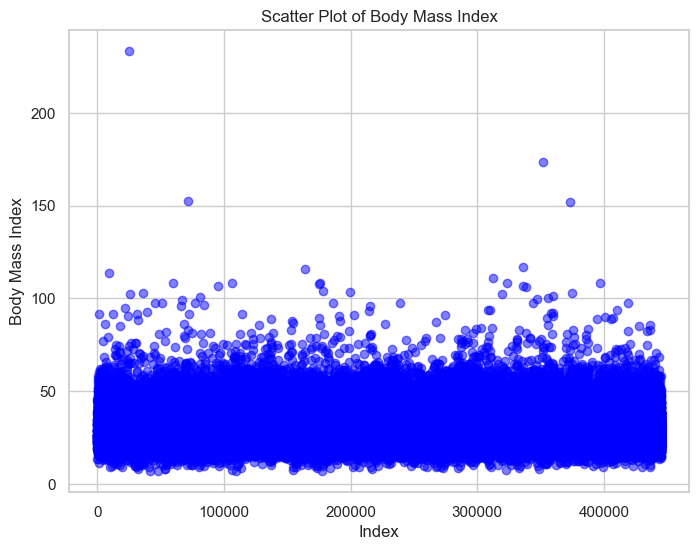

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(df2.index, df2['Body_Mass_Index'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Body Mass Index')
plt.xlabel('Index')
plt.ylabel('Body Mass Index')
plt.grid(True)
plt.show()

In [73]:
# Classifying BMI with respective scales
# Define the BMI categories and labels with specific ranges
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

# Create the 'BMI_scale' variable using cut() function with specific ranges
df2['BMI_scale'] = pd.cut(df2['Body_Mass_Index'], bins=bmi_bins, labels=bmi_labels, right=False)

# Display the DataFrame with the new 'BMI_scale' variable
print(df2[['Body_Mass_Index', 'BMI_scale']].head())

   Body_Mass_Index      BMI_scale
0            28.70     Overweight
1            26.57     Overweight
2            25.60     Overweight
3            23.30  Normal weight
4            21.77  Normal weight


In [74]:
# Imputing nan values with the mode as it is significantly low
df2['100_Cigarettes_Lifetime'].fillna(df2['100_Cigarettes_Lifetime'].mode()[0], inplace=True)
df2['Ecigs_Vapes'].fillna(df2['Ecigs_Vapes'].mode()[0], inplace=True)
df2['CHILDREN'].fillna(df2['CHILDREN'].mode()[0], inplace=True)
df2['Employed_Status'].fillna(df2['Employed_Status'].mode()[0], inplace=True)
df2['Mental_Health_Days'].fillna(df2['Mental_Health_Days'].mode()[0], inplace=True)
df2['Deppresive_Dissorder'].fillna(df2['Deppresive_Dissorder'].mode()[0], inplace=True)
df2['Sleep_Hours_per_day'].fillna(df2['Sleep_Hours_per_day'].mode()[0], inplace=True)

In [75]:
total_rows = len(df2)
missing_percentage = (df2.isna().sum() / total_rows) * 100
print("Percentage of missing values for each variable:")
print(missing_percentage)

Percentage of missing values for each variable:
State                         0.00
Date                          0.00
Mental_Health_Days            0.00
Sleep_Hours_per_day           0.00
Deppresive_Dissorder          0.00
Marrital_Status               0.00
Home_Ownership                0.00
Employed_Status               0.00
CHILDREN                      0.00
100_Cigarettes_Lifetime       0.00
Ecigs_Vapes                   0.00
Covid_Status_Ever            11.06
Satisfaction_Level           42.83
Emotional_Support_Recieved   42.91
Social_Isolation             42.99
Stress_30days                43.56
Physical_Health               0.00
Physically_Active_30days      0.00
Sex_at_Birth                  0.00
Age_Distrubution              0.00
Height(inches)                0.00
Weight(kilograms)             0.00
BMI                          10.96
Education                     0.00
Income                        0.00
Smoking                       0.00
Drunk_30days                  0.00
Drinks_

In [76]:
df2.drop(columns=['BMI'], inplace=True)

In [77]:
df2.to_csv('MentalHealth.csv', index=False)

In [86]:
df2.columns

Index(['State', 'Date', 'Mental_Health_Days', 'Sleep_Hours_per_day',
       'Deppresive_Dissorder', 'Marrital_Status', 'Home_Ownership',
       'Employed_Status', 'CHILDREN', '100_Cigarettes_Lifetime', 'Ecigs_Vapes',
       'Covid_Status_Ever', 'Satisfaction_Level', 'Emotional_Support_Recieved',
       'Social_Isolation', 'Stress_30days', 'Physical_Health',
       'Physically_Active_30days', 'Sex_at_Birth', 'Age_Distrubution',
       'Height(inches)', 'Weight(kilograms)', 'Education', 'Income', 'Smoking',
       'Drunk_30days', 'Drinks_per_Day', 'Race/Ethnicity', 'Height(meters)',
       'Body_Mass_Index', 'BMI_scale'],
      dtype='object')

In [92]:
df2['Deppresive_Dissorder'].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
df2.head(5)

,State,Date,Mental_Health_Days,Sleep_Hours_per_day,Deppresive_Dissorder,Marrital_Status,Home_Ownership,Employed_Status,CHILDREN,100_Cigarettes_Lifetime,...,Weight(kilograms),Education,Income,Smoking,Drunk_30days,Drinks_per_Day,Race/Ethnicity,Height(meters),Body_Mass_Index,BMI_scale
0,Alabama,02-03-2022,0.00,8.00,No,Married,Own,Retired,0,No,...,75.83,Graduated from College or Technical School,Don’t know/Not sure/Missing,Never smoked,No,0.00,White,1.63,28.70,Overweight
1,Alabama,02-04-2022,0.00,6.00,No,Widowed,Own,Self-employed,0,No,...,68.04,Graduated High School,"$25,000 to < $35,000",Never smoked,No,0.00,White,1.60,26.57,Overweight
2,Alabama,02-02-2022,3.00,5.00,No,Married,Own,Retired,0,No,...,63.50,Graduated from College or Technical School,"$100,000 to < $200,000",Never smoked,No,0.00,White,1.57,25.60,Overweight
3,Alabama,02-03-2022,0.00,7.00,No,Married,Own,Retired,0,Yes,...,63.50,Graduated High School,Don’t know/Not sure/Missing,Some days,No,0.00,White,1.65,23.30,Normal weight
4,Alabama,02-02-2022,0.00,9.00,No,Married,Own,A homemaker,0,No,...,53.98,Attended College or Technical School,"$25,000 to < $35,000",Never smoked,Yes,10.00,White,1.57,21.77,Normal weight
